In [38]:
#the purpose of this notebook is to evaluate the resolving power needed
#in the mz, rt, and ms2 directions
#in order to separate compounds

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
positive_dataset_address='/Users/parker.bremer/coding_projects/bucketbase/data/total_features_lists/HILIC_Features_Database_-_May_2022_-_Positive_Mode_Features.tsv'

In [41]:
negative_dataset_address='/Users/parker.bremer/coding_projects/bucketbase/data/total_features_lists/HILIC_Features_Database_-_May_2022_-_Negative_Mode_Features.tsv'

In [42]:
positive_mode_panda=pd.read_csv(positive_dataset_address,sep='\t')

In [43]:
negative_mode_panda=pd.read_csv(negative_dataset_address,sep='\t')

In [44]:
ms_dial_names_to_annotation_names_dict={
    '1_Methionine_d8':['Methionine-d8','1_Methionine_d8','1_D8-Methionine iSTD','D8-Methionine iSTD'],
    '1_1-Methylnicotinamide_d3':['1_1-Methylnicotinamide_d3','D3-1-Methylnicotinamide iSTD; [M+H]+; HCD (NCE 20-30-40%)','1_1_Methylnicotinamide_d3','1_D3-1-Methylnicotinamide iSTD','D3-1-Methylnicotinamide iSTD','1_D3-1-Methylnicotinamide'],
    '1_Creatinine_d5':['1_Creatinine_d3','1_D3-Creatine iSTD','D3-Creatinine iSTD','Creatinine-d3'],
    '1_Carnitine_d3':['Carnitine-d3','Carnitine_d3','1_Carnitine_d3','D3-L-Carnitine iSTD','1_D3-Carnitine iSTD'],
    '1_Acetylecarnitine_d3':['D3-AC(2:0) iSTD; [M+H]+; HCD (NCE 20-30-40%)','1_Acetylcarnitine_d3','1_D3-AcetylCarnitine','Acetylcarnitine_d3','D3-AC(2:0) iSTD'],
    '1_TMAO_d9':['D9-TMAO iSTD; [M+H]+; HCD (NCE 20-30-40%)','D9-TMAO iSTD','1_TMAO_d9','1_D9-TMAO iSTD','TMAOd9'],
    '1_Choline_d9':['D9-Choline iSTD; [M+H]+; HCD (NCE 20-30-40%)','1_Choline_d9','D9-Choline iSTD','1_D9-Choline iSTD'],
    '1_Glutamine_d5':['D5-Glutamine iSTD; [M+H]+; HCD (NCE 20-30-40%)','1_Glutamine_d5','1_D5-Glutamine iSTD','1_D5-L-Glutamine','1_D5-L-Glutamine iSTD','1_Glutamine_d6'],
    '1_Glutamic Acid_d3':['D3-Glutamic acid iSTD','D3-DL-Glutamic acid iSTD','1_Glutamic Acid_d3','1_D3-Glutamic acid iSTD','Glutamic Acid d3','Glutamine_d5'],
    '1_Arginine_d7':['1_Arginine_d7','D7-Arginine iSTD','Arginine_d7','Arginine d7'],
    '1_Alanine_d3':['1_Alanine_d3','1_D3-Alanine iSTD','D3-DL-Alanine iSTD'],
    '1_Valine_d8':['Valine-d8','1_Valine_d8'],
    '1_Tryptophan_d5':['Tryptophan-d5','1_Tryptophan-d5','Tryptophan d5','1_Tryptophan_d5'],
    '1_Serine_d3':['1_Serine_d3','Serine-d8','1_Serine-d8','1_Serine-d3','Serine d8','Serine_d8','1_Serine_d8'],
    '1_Lysine_d8':['Lysine-d8','1_Lysine-d8'],
    '1_Phenylalanine_d8':['Phenylalanine-d8','1_Phenylalanine-d8','Phenylalanine d8','1_Phenylalanine_d8'],
    '1_HippuricAcid_d5':['HippuricAcid-d5','1_HippuricAcid-d5','1_Hippuric Acid d5','1_HippuricAcid_d5','Hippuric Acid d5','1_d5_Hippuric Acid'],
    '1_CUDA':['CUDA','1_CUDA','CUDA iSTD','1_CUDA iSTD']
}

In [45]:
column_replacement_dict_for_istd=dict()

In [46]:
for temp_key in ms_dial_names_to_annotation_names_dict.keys():
    #there is some issue with value assignment so we dont do list comp
    for temp_value in ms_dial_names_to_annotation_names_dict[temp_key]:
        column_replacement_dict_for_istd[temp_value]=temp_key

In [47]:
positive_mode_panda

,Study,Matrix,Mode,Identifier,Alignment ID,Annotation,INCHIKEY,RT,m/z
0,ALCH001,Plasma,HILIC_Pos,7.24_132.1,1198,Isoleucine,AGPKZVBTJJNPAG-WHFBIAKZSA-N,7.235,132.10181
1,ALCH001,Plasma,HILIC_Pos,9.62_133.1,1233,Ornithine,AHLPHDHHMVZTML-BYPYZUCNSA-N,9.616,133.09711
2,ALCH001,Plasma,HILIC_Pos,1.51_138.05,1321,4-aminobenzoic acid,ALYNCZNDIQEVRV-UHFFFAOYSA-N,1.508,138.05489
3,ALCH001,Plasma,HILIC_Pos,1.16_288.25,4426,Lauric acid diethanolamide,AOMUHOFOVNGZAN-UHFFFAOYSA-N,1.16,288.25284
4,ALCH001,Plasma,HILIC_Pos,3.22_260.16,3988,Propranolol,AQHHHDLHHXJYJD-UHFFFAOYSA-N,3.216,260.16403
...,...,...,...,...,...,...,...,...,...
10976,ZOQU001,Human plasma,HILIC_Pos,7.51_138.05,818,TRIGONELLINE,WWNNZCOKKKDOPX-UHFFFAOYSA-N,7.51,138.05469
10977,ZOQU001,Human plasma,HILIC_Pos,6.94_205.1,1758,Tryptophan,QIVBCDIJIAJPQS-VIFPVBQESA-N,6.943,205.09697
10978,ZOQU001,Human plasma,HILIC_Pos,7.83_182.08,1482,Tyrosine,OUYCCCASQSFEME-QMMMGPOBSA-N,7.83,182.08099
10979,ZOQU001,Human plasma,HILIC_Pos,2.86_61.04,9,Urea,XSQUKJJJFZCRTK-UHFFFAOYSA-N,2.855,61.03971


In [48]:
positive_mode_panda.INCHIKEY.value_counts()

Internal Standard                118
iSTD                              85
HNDVDQJCIGZPNO-YFKPBYRVSA-N       39
OEYIOHPDSNJKLS-UHFFFAOYSA-N       38
KDXKERNSBIXSRK-YFKPBYRVSA-N       38
                                ... 
KSPQDMRTZZYQLM-UHFFFAOYSA-N        1
LCAINUZZHIZKKS-UHFFFAOYSA-N        1
MBNGWHIJMBWFHU-UHFFFAOYSA-N        1
LZJXOHRONRTVRW-JTQLQIEISA-N        1
JACRWUWPXAESPB-UHFFFAOYSA-N        1
Name: INCHIKEY, Length: 1756, dtype: int64

In [50]:
def make_resolution_scatter(temp_panda):
    #remove istd
    #assign x,y,color based on rt,mz,inchikey
    plt.scatter(
        x=temp_panda.loc[
            (~temp_panda.INCHIKEY.isin(['Internal Standard','iSTD']))
        ]['RT'].astype(float).tolist(),
        y=temp_panda.loc[
            (~temp_panda.INCHIKEY.isin(['Internal Standard','iSTD']))
        ]['m/z'].astype(float).tolist(),
        #colors=temp_panda.loc[
        #    (~temp_panda.INCHIKEY.isin(['Internal Standard','iSTD']))
        #]['INCHIKEY'].tolist(),
    )
    plt.show()
    #draw

In [51]:
positive_mode_panda.loc[
    positive_mode_panda['RT'].str.contains('_')
]

,Study,Matrix,Mode,Identifier,Alignment ID,Annotation,INCHIKEY,RT,m/z
2412,CENO003,E. lenta,HILIC_Pos,#VALUE!,874_3405,.epsilon.-Caprolactam A,JBKVHLHDHHXQEQ-UHFFFAOYSA-N,1.277_1.276,114.09096_227.17453
2413,CENO003,E. lenta,HILIC_Pos,#VALUE!,3406_875,.epsilon.-Caprolactam B,JBKVHLHDHHXQEQ-UHFFFAOYSA-N,1.387_1.387,227.17462_114.09101
2420,CENO003,E. lenta,HILIC_Pos,#VALUE!,4366_4083,2'-Deoxyguanosine,YKBGVTZYEHREMT-KVQBGUIXSA-N,6.527_6.527,290.08499_268.10345
2421,CENO003,E. lenta,HILIC_Pos,#VALUE!,1446_3854_4194,2'-Deoxyinosine,VGONTNSXDCQUGY-JXBXZBNISA-N,5.268_5.268_5.269,137.04549_253.09229_275.07419
2424,CENO003,E. lenta,HILIC_Pos,#VALUE!,697_1142,2-Phenylethylamine,BHHGXPLMPWCGHP-UHFFFAOYSA-N,4.772_4.771,105.06975_122.09619
...,...,...,...,...,...,...,...,...,...
10862,VEES001,Bacterial supernatant,HILIC_Pos,#VALUE!,422_749,Threonine,AYFVYJQAPQTCCC-GBXIJSLDSA-N,8.361_8.361,102.05483_120.06527
10868,VEES001,Bacterial supernatant,HILIC_Pos,#VALUE!,1184_453_487,Tropic acid,JACRWUWPXAESPB-UHFFFAOYSA-N,6.919_6.919_6.919,149.05972_103.05411_107.04903
10869,VEES001,Bacterial supernatant,HILIC_Pos,#VALUE!,1337_1079,Tryptamine,APJYDQYYACXCRM-UHFFFAOYSA-N,5.057_5.056,161.10712_144.08064
10870,VEES001,Bacterial supernatant,HILIC_Pos,#VALUE!,1135_1816_1655,Tryptophan,QIVBCDIJIAJPQS-VIFPVBQESA-N,6.89_6.891_6.891,146.05975_205.09676_188.07027


In [52]:
positive_mode_panda=positive_mode_panda.loc[
    (~positive_mode_panda['RT'].str.contains('_'))
]

In [53]:
negative_mode_panda=negative_mode_panda.loc[
    (~negative_mode_panda['RT'].str.contains('_'))
]

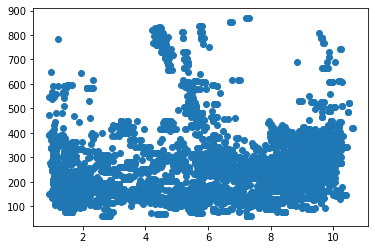

In [54]:
make_resolution_scatter(positive_mode_panda)

In [55]:
len(positive_mode_panda.INCHIKEY.unique())

1753

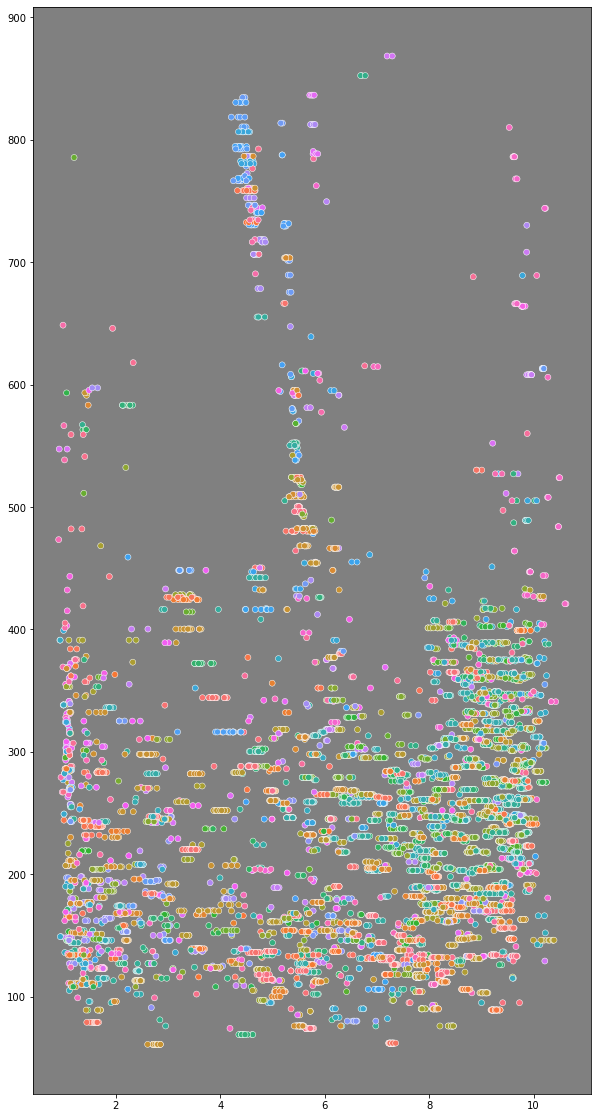

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,20))
ax.set_facecolor('grey')
#ax.scatter(x_positions,y_positions,s=3,c=colors,cmap='flag',facecolor='grey')
sns.scatterplot(
    x=positive_mode_panda.loc[
        (~positive_mode_panda.INCHIKEY.isin(['Internal Standard','iSTD']))
    ]['RT'].astype(float).tolist(),
    y=positive_mode_panda.loc[
        (~positive_mode_panda.INCHIKEY.isin(['Internal Standard','iSTD']))
    ]['m/z'].astype(float).tolist(),
    hue=positive_mode_panda.loc[
        (~positive_mode_panda.INCHIKEY.isin(['Internal Standard','iSTD']))
    ]['INCHIKEY'].tolist(),
    legend=False
)
plt.show()

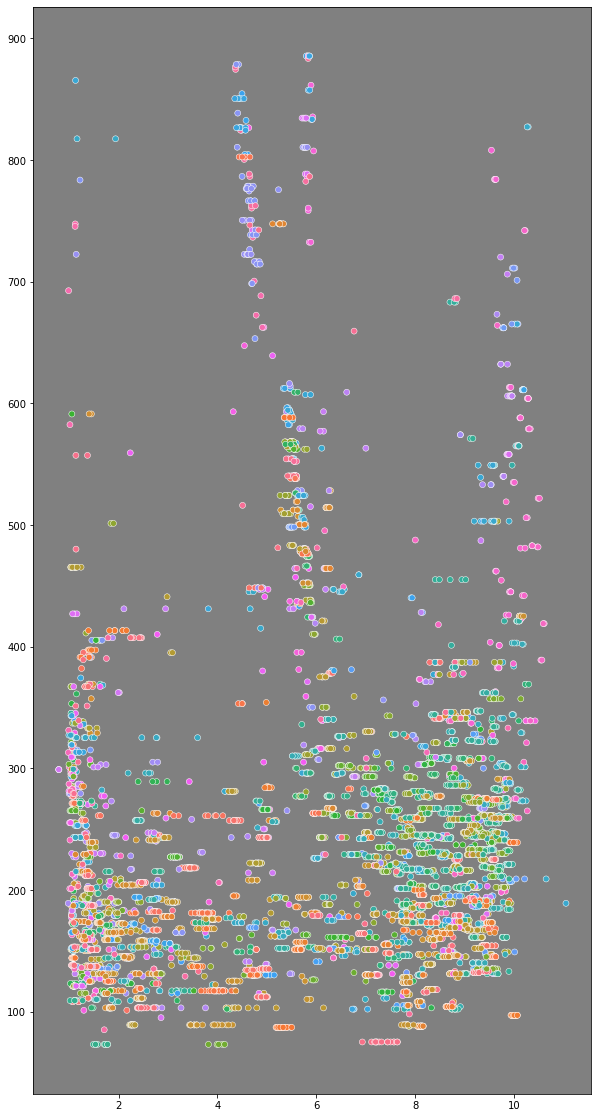

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,20))
ax.set_facecolor('grey')
#ax.scatter(x_positions,y_positions,s=3,c=colors,cmap='flag',facecolor='grey')
sns.scatterplot(
    x=negative_mode_panda.loc[
        (~negative_mode_panda.INCHIKEY.isin(['Internal Standard','iSTD']))
    ]['RT'].astype(float).tolist(),
    y=negative_mode_panda.loc[
        (~negative_mode_panda.INCHIKEY.isin(['Internal Standard','iSTD']))
    ]['m/z'].astype(float).tolist(),
    hue=negative_mode_panda.loc[
        (~negative_mode_panda.INCHIKEY.isin(['Internal Standard','iSTD']))
    ]['INCHIKEY'].tolist(),
    legend=False
)
plt.show()